In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/aceboogie/Desktop/churn_clean.csv')

In [3]:

continuous_vars = ['Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Yearly_equip_failure']

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

In [4]:
# Compute the covariance matrix
cov_matrix = df[continuous_vars].cov()

# Print the covariance matrix
print(cov_matrix)

                           Age    Income    Tenure  MonthlyCharge  \
Age                   1.000100 -0.004091  0.016981       0.010730   
Income               -0.004091  1.000100  0.002115      -0.003014   
Tenure                0.016981  0.002115  1.000100      -0.003337   
MonthlyCharge         0.010730 -0.003014 -0.003337       1.000100   
Bandwidth_GB_Year    -0.014725  0.003674  0.991594       0.060412   
Outage_sec_perweek   -0.008048 -0.010012  0.002932       0.020498   
Yearly_equip_failure  0.008578  0.005424  0.012436      -0.007173   

                      Bandwidth_GB_Year  Outage_sec_perweek  \
Age                           -0.014725           -0.008048   
Income                         0.003674           -0.010012   
Tenure                         0.991594            0.002932   
MonthlyCharge                  0.060412            0.020498   
Bandwidth_GB_Year              1.000100            0.004176   
Outage_sec_perweek             0.004176            1.000100   
Yearly

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('/Users/aceboogie/Desktop/churn_clean.csv') 
continuous_vars = ['Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Yearly_equip_failure']

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

# Perform PCA
pca = PCA(n_components=len(continuous_vars))
pca.fit(df[continuous_vars])

# Get the explained variance (eigenvalues) of each component
explained_variance = pca.explained_variance_

# Apply the Kaiser Criterion
num_components = sum([1 for var in explained_variance if var > 1])

print(f"The number of principal components according to the Kaiser Criterion is {num_components}.")

# Export the cleaned dataset to a CSV file
df.to_csv('/Users/aceboogie/Desktop/cleaned_dataset_Pt2.csv', index=False)

The number of principal components according to the Kaiser Criterion is 4.


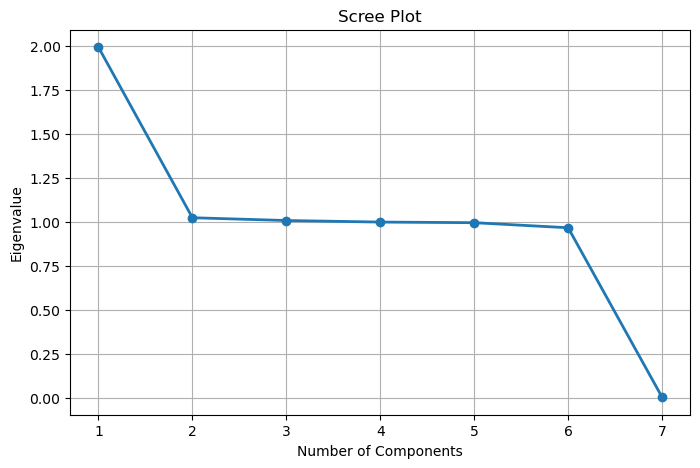

In [6]:
import matplotlib.pyplot as plt
import numpy as np


explained_variance = pca.explained_variance_

# Generate the scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(continuous_vars) + 1), explained_variance, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


In [7]:

explained_variance = pca.explained_variance_

# Print the variance of each principal component
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: Variance = {var}")


Principal Component 1: Variance = 1.9936823560814663
Principal Component 2: Variance = 1.0253186417382654
Principal Component 3: Variance = 1.0094794291254061
Principal Component 4: Variance = 1.0007345947821493
Principal Component 5: Variance = 0.9971469498712802
Principal Component 6: Variance = 0.9684072752844944
Principal Component 7: Variance = 0.005930823123944586


In [8]:
# fitted PCA object
explained_variance = pca.explained_variance_

# Calculate the total variance captured by the principal components
total_variance = sum(explained_variance)

print(f"The total variance captured by the principal components is {total_variance}.")


The total variance captured by the principal components is 7.000700070007007.


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/Users/aceboogie/Desktop/churn_clean.csv')

continuous_vars = ['Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Yearly_equip_failure']

# Select only the continuous variables from the dataframe
df_continuous = df[continuous_vars].copy()

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
df_continuous = scaler.fit_transform(df_continuous)

# Convert the numpy array back to a dataframe
df_continuous = pd.DataFrame(df_continuous, columns=continuous_vars)

# Save the cleaned, selected, and standardized continuous variables to a new CSV file
df_continuous.to_csv('/Users/aceboogie/Desktop/cleaned_and_standardized_dataset.csv', index=False)


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/Users/aceboogie/Desktop/churn_clean.csv')

continuous_vars = ['Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Yearly_equip_failure']

# Select only the continuous variables from the dataframe
df_continuous = df[continuous_vars].copy()

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
df_continuous_standardized = scaler.fit_transform(df_continuous)

# Perform PCA
pca = PCA(n_components=len(continuous_vars))
pca.fit(df_continuous_standardized)

# Get the component_ attribute which returns a matrix where the columns are the principal components
# and the rows correspond to the original features.
components_matrix = pd.DataFrame(pca.components_, columns=continuous_vars)

# Printing the components_matrix
print(components_matrix)


        Age    Income    Tenure  MonthlyCharge  Bandwidth_GB_Year  \
0  0.002106  0.004019  0.705762       0.040627           0.707036   
1 -0.040064  0.379763  0.037401      -0.642638          -0.001910   
2  0.821255 -0.018627 -0.005879       0.197197          -0.019699   
3 -0.360481  0.392439 -0.015477      -0.028396          -0.004820   
4  0.084285  0.801811 -0.027261       0.489033           0.002812   
5 -0.431684 -0.241881 -0.041220       0.551763           0.008402   
6  0.023011 -0.001151 -0.705539      -0.045578           0.706828   

   Outage_sec_perweek  Yearly_equip_failure  
0            0.005885              0.017162  
1           -0.633768              0.195261  
2           -0.101590              0.524942  
3            0.496673              0.684318  
4           -0.117918             -0.310139  
5           -0.572183              0.348622  
6            0.000227             -0.000253  


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/Users/aceboogie/Desktop/churn_clean.csv')

continuous_vars = ['Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Yearly_equip_failure']

# Select only the continuous variables from the dataframe
df_continuous = df[continuous_vars].copy()

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
df_continuous_standardized = scaler.fit_transform(df_continuous)

# Perform PCA
pca = PCA(n_components=len(continuous_vars))
pca.fit(df_continuous_standardized)

# Get the explained variance ratio (percentage of variance explained by each of the selected components)
explained_variance_ratio = pca.explained_variance_ratio_

# Print the variance ratio of each principal component
for i, var_ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {var_ratio * 100}% of the variance is explained.")


Principal Component 1: 28.47832839779795% of the variance is explained.
Principal Component 2: 14.645944426772726% of the variance is explained.
Principal Component 3: 14.419692588321325% of the variance is explained.
Principal Component 4: 14.294778876038148% of the variance is explained.
Principal Component 5: 14.243531931089889% of the variance is explained.
Principal Component 6: 13.833006207956647% of the variance is explained.
Principal Component 7: 0.08471757202331696% of the variance is explained.


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/Users/aceboogie/Desktop/churn_clean.csv')

continuous_vars = ['Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Yearly_equip_failure']

# Select only the continuous variables from the dataframe
df_continuous = df[continuous_vars].copy()

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
df_continuous_standardized = scaler.fit_transform(df_continuous)

# Perform PCA
pca = PCA(n_components=len(continuous_vars))
pca.fit(df_continuous_standardized)

# Get the explained variance ratio (percentage of variance explained by each of the selected components)
explained_variance_ratio = pca.explained_variance_ratio_

# The number of components according to the Kaiser Criterion
num_components = sum([1 for var in explained_variance_ratio if var > 1/len(continuous_vars)])

# Calculate the total variance explained by the selected principal components
total_variance_explained = sum(explained_variance_ratio[:num_components]) * 100

print(f"The total variance explained by the {num_components} principal components is {total_variance_explained}%.")


The total variance explained by the 4 principal components is 71.83874428893014%.
